In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn.model_selection import train_test_split


In [12]:
df = pd.read_csv("candy_data.csv")
df=df.drop(['competitorname'],axis=1)
df.head()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   chocolate         85 non-null     int64  
 1   fruity            85 non-null     int64  
 2   caramel           85 non-null     int64  
 3   peanutyalmondy    85 non-null     int64  
 4   nougat            85 non-null     int64  
 5   crispedricewafer  85 non-null     int64  
 6   hard              85 non-null     int64  
 7   bar               85 non-null     int64  
 8   pluribus          85 non-null     int64  
 9   sugarpercent      85 non-null     float64
 10  pricepercent      85 non-null     float64
 11  winpercent        85 non-null     float64
dtypes: float64(3), int64(9)
memory usage: 8.1 KB


In [14]:
df.describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.517647,0.478647,0.468882,50.316764
std,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.502654,0.282778,0.285740,14.714357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,22.445341
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.255000,39.141056
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.465000,0.465000,47.829754
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,59.863998
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988000,0.976000,84.180290


In [11]:
duplicates=df[df.duplicated()]
print("No. of duplicates" , duplicates)

No. of duplicates Empty DataFrame
Columns: [competitorname, chocolate, fruity, caramel, peanutyalmondy, nougat, crispedricewafer, hard, bar, pluribus, sugarpercent, pricepercent, winpercent]
Index: []


In [15]:
trainingSet,testSet = train_test_split(df,test_size=0.2,random_state=42)

In [16]:
train_df = trainingSet
test_df = testSet

In [18]:
train_df = train_df.dropna()
test_df = test_df.dropna()

In [19]:
x_train = train_df[['fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent', 'pricepercent', 'winpercent']]
y_train = train_df[['chocolate']]

x_test = test_df[['fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent', 'pricepercent', 'winpercent']]
y_test = test_df[['chocolate']]


In [20]:
x_train.shape, x_test.shape, y_train.shape,y_test.shape

((68, 11), (17, 11), (68, 1), (17, 1))

In [21]:
y_train.value_counts()

chocolate
0            39
1            29
Name: count, dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_13856\2099695709.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="chocolate",data=train_df,palette='Blues_d')


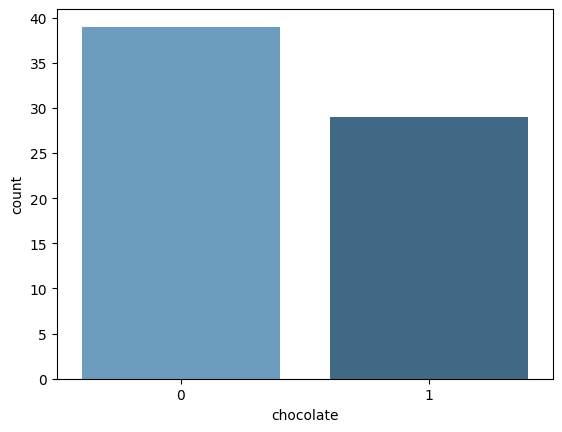

<Figure size 640x480 with 0 Axes>

In [22]:
import seaborn as sns
sns.countplot(x="chocolate",data=train_df,palette='Blues_d')
plt.show()
plt.savefig('count_plot')

In [23]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train,y_train)


C:\Users\user\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [24]:
y_pred = logreg.predict(x_test)

In [27]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[8, 1],
       [1, 7]])

<Axes: >

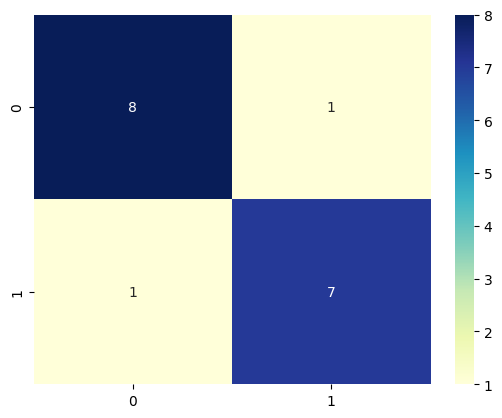

In [28]:
class_names=[0,1] #name of classes
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap="YlGnBu",fmt='g')


In [29]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print("Precision:",metrics.precision_score(y_test,y_pred))
print("Recall:",metrics.recall_score(y_test,y_pred))

Accuracy: 0.8823529411764706
Precision: 0.875
Recall: 0.875
